In [2]:
import numpy as np
from sv_qnute import qnute as s_qnute
from taylor_qnute import qnute as t_qnute

from hamiltonians import Hamiltonian
from qnute_params import QNUTE_params as Params

In [33]:
###########################
# Hamiltonian Description #
###########################

# Qubit lattice dimension
d = 2
# Qubit lattice bound
l = 2
# Map qubit lattice to physical qubits
# Set to None for linear topologies
qubit_map = {
    (0,0): 0,
    (0,1): 1,
    (1,0): 2,
    (1,1): 3
}

# Hamiltonian terms
hm_list = [
    [ [0, 3*4+3*1], [-1.0, 1.0], [(0,0),(0,1)] ],
    [ [0, 3*4+3*1], [-1.0, 1.0], [(1,0),(0,0)] ]
]

H = Hamiltonian(hm_list, d, l, qubit_map)
H.multiply_scalar(-1)

H.print()
print(H.get_matrix())

Term 1 acting on the qubit locations [(0, 0), (0, 1)]:
	(1.00 + 0.00i) I_(0, 0) I_(0, 1) +
	(-1.00 + 0.00i) Z_(0, 0) Z_(0, 1) 
Term 2 acting on the qubit locations [(1, 0), (0, 0)]:
	(1.00 + 0.00i) I_(1, 0) I_(0, 0) +
	(-1.00 + 0.00i) Z_(1, 0) Z_(0, 0) 
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 4.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 

In [43]:
from helpers import get_m_sphere, get_center

print(qubit_map.keys())
c = get_center(list(qubit_map.keys()))
print(c)
print(get_m_sphere(c, 1, d, l))

dict_keys([(0, 0), (0, 1), (1, 0), (1, 1)])
[0.5 0.5]
[(0, 0), (0, 1), (1, 0), (1, 1)]


In [53]:
####################
# QNUTE Parameters #
####################

from qiskit import Aer

# Size of time step
dt = 0.1
# Number of time steps, total simulation time t=N*dt
N = 30

# Regularizer for linear
delta = 0.1

# Maximum unitary domain diameter
D = 1

num_shots = 0
backend = Aer.get_backend('statevector_simulator')

init_state = np.ones(16, dtype=complex) * np.sqrt(1/16)

params = Params(H)
params.load_hamiltonian_params(D, reduce_dim=False, load_measurements=True)
params.set_run_params(dt, delta, N, num_shots, backend, init_sv=init_state)

Performing Hamiltonian precalculations...
	Calculating Unitary Domains... Done
	Calculating Required Pauli Measurements... Done


C:\Users\CMP3KUMARS\Desktop\QITE\helpers.py:78: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(points,axis=0)/n


In [54]:
times, svs, alist, S_list, b_list = s_qnute(params)

Starting Statevector QNUTE Simulation:
Iteration 1... 

TypeError: unsupported operand type(s) for %: 'list' and 'int'

In [45]:
times, svs, alist, S_list, b_list = t_qnute(params)

Iteration 1... Done -- Iteration time = 0.06 seconds
Iteration 2... Done -- Iteration time = 0.04 seconds
Iteration 3... Done -- Iteration time = 0.04 seconds
Iteration 4... Done -- Iteration time = 0.04 seconds
Iteration 5... Done -- Iteration time = 0.04 seconds
Iteration 6... Done -- Iteration time = 0.03 seconds
Iteration 7... Done -- Iteration time = 0.03 seconds
Iteration 8... Done -- Iteration time = 0.03 seconds
Iteration 9... Done -- Iteration time = 0.04 seconds
Iteration 10... Done -- Iteration time = 0.04 seconds
Iteration 11... Done -- Iteration time = 0.03 seconds
Iteration 12... Done -- Iteration time = 0.03 seconds
Iteration 13... Done -- Iteration time = 0.03 seconds
Iteration 14... Done -- Iteration time = 0.03 seconds
Iteration 15... Done -- Iteration time = 0.03 seconds
Iteration 16... Done -- Iteration time = 0.04 seconds
Iteration 17... Done -- Iteration time = 0.04 seconds
Iteration 18... Done -- Iteration time = 0.03 seconds
Iteration 19... Done -- Iteration tim

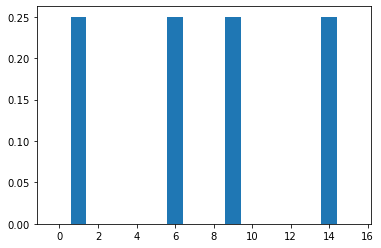

In [52]:
probs = np.abs(svs[-1])**2
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(np.arange(0,16,1), probs)
plt.show()

In [55]:
E = np.zeros(len(svs),dtype=float)
for i in range(len(svs)):
    E[i] = np.conj(svs[i]).T @ H.get_matrix() @ svs[i]

C:\Users\CMP3KUMARS\AppData\Local\Temp\ipykernel_688\2171480017.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i] = np.conj(svs[i]).T @ H.get_matrix() @ svs[i]


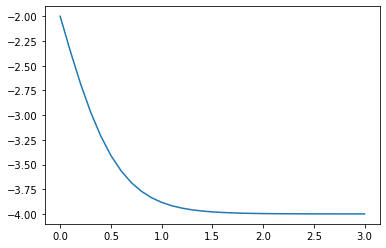

In [59]:
plt.plot(np.arange(0,N+1, 1)*dt, -E)
plt.show()